In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = "/scratch/racosta6/resolution-test/"
file = "F.1850x2.0_C5_280_ihesp1046.01_ANN_concat.nc"

In [3]:
ds = xr.open_dataset(path + file)
ds

<xarray.Dataset>
Dimensions:        (time: 12, lat: 96, lon: 144, lev: 30, ilev: 31, slat: 95, slon: 144, nbnd: 2)
Coordinates:
  * ilev           (ilev) float64 2.255 5.032 10.16 18.56 ... 967.5 985.1 1e+03
  * lat            (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
  * lev            (lev) float64 3.643 7.595 14.36 24.61 ... 957.5 976.3 992.6
  * lon            (lon) float64 0.0 2.5 5.0 7.5 ... 350.0 352.5 355.0 357.5
  * slat           (slat) float64 -89.05 -87.16 -85.26 ... 85.26 87.16 89.05
  * slon           (slon) float64 -1.25 1.25 3.75 6.25 ... 351.2 353.8 356.2
  * time           (time) object 0010-08-02 12:00:00 ... 0011-07-02 12:00:00
Dimensions without coordinates: nbnd
Data variables: (12/167)
    AEROD_v        (time, lat, lon) float32 ...
    ANRAIN         (time, lev, lat, lon) float32 ...
    ANSNOW         (time, lev, lat, lon) float32 ...
    AODDUST1       (time, lat, lon) float32 ...
    AODDUST3       (time, lat, lon) float32 ...
    AODVIS         (time, lat, lon) float32 ...
    ...             ...
    soa_a2_SRF     (time, lat, lon) float32 ...
    sol_tsi        (time) float64 ...
    time_bnds      (time, nbnd) object ...
    time_written   (time) |S8 ...
    w_stag         (slat) float64 ...
    wnummax        (lat) int32 ...
Attributes:
    Conventions:      CF-1.0
    source:           CAM
    case:             F.1850x2.0_C5_280_ihesp1046.01
    title:            UNSET
    logname:          pacosta
    host:             derecho3
    Version:          $Name$
    revision_Id:      $Id$
    initial_file:     /glade/derecho/scratch/pacosta/F.1850x2.0_C5_280_ihesp1...
    topography_file:  /glade/campaign/cesm/cesmdata/inputdata/atm/cam/topo/co...
    history:          Sun Jul  7 06:50:49 2024: ncrcat -O F.1850x2.0_C5_280_i...
    NCO:              netCDF Operators version 5.1.9 (Homepage = http://nco.s...

/home/vreddy6/.conda/envs/clim_data/lib/python3.10/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
/home/vreddy6/.conda/envs/clim_data/lib/python3.10/site-packages/xarray/coding/cftimeindex.py:469: FutureWarning: Passing method to CFTimeIndex.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  return pd.Index.get_loc(self, key, method=method, tolerance=tolerance)


Text(0.5, 1.0, 'CESM 0-360')

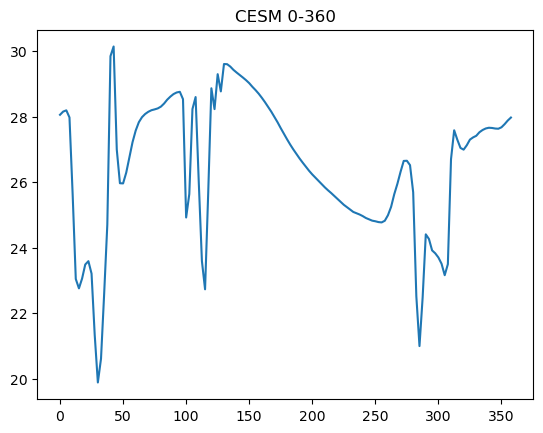

In [4]:
ts = ds['TS']
ts = ts - 273

ts_check=ts.sel(lat=0,
                                time=ds['time'][0],
                                method='nearest')
plt.plot(ds['lon'],ts_check)
plt.title('CESM 0-360')

In [5]:
new_lon = ((ds['lon'] + 180) % 360) - 180
new_lon

<xarray.DataArray 'lon' (lon: 144)>
array([   0. ,    2.5,    5. ,    7.5,   10. ,   12.5,   15. ,   17.5,
         20. ,   22.5,   25. ,   27.5,   30. ,   32.5,   35. ,   37.5,
         40. ,   42.5,   45. ,   47.5,   50. ,   52.5,   55. ,   57.5,
         60. ,   62.5,   65. ,   67.5,   70. ,   72.5,   75. ,   77.5,
         80. ,   82.5,   85. ,   87.5,   90. ,   92.5,   95. ,   97.5,
        100. ,  102.5,  105. ,  107.5,  110. ,  112.5,  115. ,  117.5,
        120. ,  122.5,  125. ,  127.5,  130. ,  132.5,  135. ,  137.5,
        140. ,  142.5,  145. ,  147.5,  150. ,  152.5,  155. ,  157.5,
        160. ,  162.5,  165. ,  167.5,  170. ,  172.5,  175. ,  177.5,
       -180. , -177.5, -175. , -172.5, -170. , -167.5, -165. , -162.5,
       -160. , -157.5, -155. , -152.5, -150. , -147.5, -145. , -142.5,
       -140. , -137.5, -135. , -132.5, -130. , -127.5, -125. , -122.5,
       -120. , -117.5, -115. , -112.5, -110. , -107.5, -105. , -102.5,
       -100. ,  -97.5,  -95. ,  -92.5,  -90. ,  -87.5,  -85. ,  -82.5,
        -80. ,  -77.5,  -75. ,  -72.5,  -70. ,  -67.5,  -65. ,  -62.5,
        -60. ,  -57.5,  -55. ,  -52.5,  -50. ,  -47.5,  -45. ,  -42.5,
        -40. ,  -37.5,  -35. ,  -32.5,  -30. ,  -27.5,  -25. ,  -22.5,
        -20. ,  -17.5,  -15. ,  -12.5,  -10. ,   -7.5,   -5. ,   -2.5])
Coordinates:
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5

In [6]:
ds_newcord = ds.assign_coords(lon = new_lon)


/home/vreddy6/.conda/envs/clim_data/lib/python3.10/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
/home/vreddy6/.conda/envs/clim_data/lib/python3.10/site-packages/xarray/coding/cftimeindex.py:469: FutureWarning: Passing method to CFTimeIndex.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  return pd.Index.get_loc(self, key, method=method, tolerance=tolerance)


Text(0.5, 1.0, 'CESM -180-180')

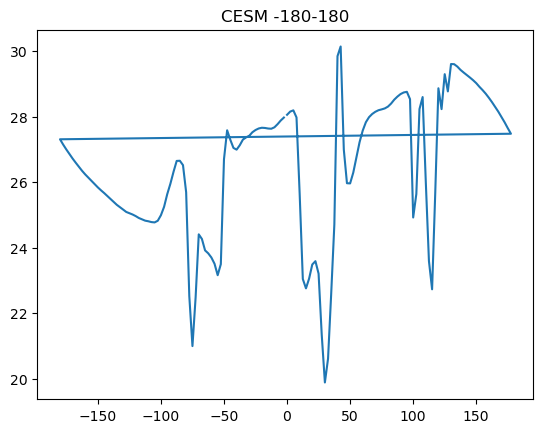

In [7]:
ts = ds_newcord['TS']
ts = ts - 273

ts_check=ts.sel(lat=0,
                                time=ds_newcord['time'][0],
                                method='nearest')
plt.plot(ds_newcord['lon'],ts_check)
plt.title('CESM -180-180')

/home/vreddy6/.conda/envs/clim_data/lib/python3.10/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
/home/vreddy6/.conda/envs/clim_data/lib/python3.10/site-packages/xarray/coding/cftimeindex.py:469: FutureWarning: Passing method to CFTimeIndex.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  return pd.Index.get_loc(self, key, method=method, tolerance=tolerance)


Text(0.5, 1.0, 'CESM -180-180')

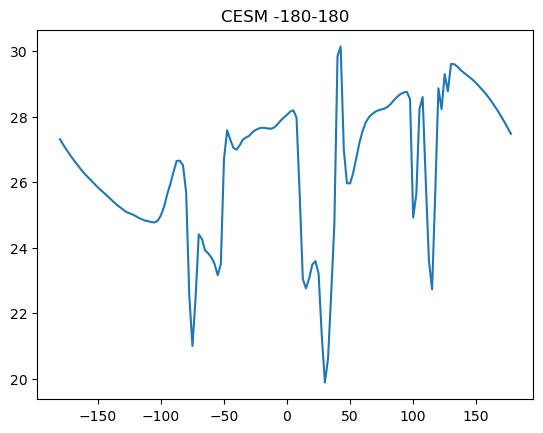

In [8]:
ds_newcord = ds_newcord.sortby(ds_newcord['lon'])
                               
ts = ds_newcord['TS']
ts = ts - 273

ts_check=ts.sel(lat=0,
                                time=ds_newcord['time'][0],
                                method='nearest')
plt.plot(ds_newcord['lon'],ts_check)
plt.title('CESM -180-180')
                               

In [9]:
ts_check

<xarray.DataArray 'TS' (lon: 144)>
array([27.30606 , 27.144714, 26.995361, 26.853424, 26.717285, 26.589417,
       26.467804, 26.343933, 26.2341  , 26.135162, 26.037628, 25.938232,
       25.83902 , 25.749878, 25.666565, 25.5766  , 25.484894, 25.393494,
       25.30838 , 25.234161, 25.164093, 25.09082 , 25.050201, 25.013031,
       24.964172, 24.905975, 24.867157, 24.825073, 24.806244, 24.781311,
       24.771454, 24.822174, 24.99054 , 25.246338, 25.631744, 25.950165,
       26.314789, 26.64618 , 26.651245, 26.517883, 25.690857, 22.521362,
       21.000671, 22.480469, 24.407593, 24.266296, 23.918396, 23.82901 ,
       23.702026, 23.511353, 23.162018, 23.498749, 26.698883, 27.580658,
       27.29306 , 27.042633, 26.990082, 27.123596, 27.296143, 27.363434,
       27.411865, 27.519653, 27.588226, 27.635315, 27.657593, 27.651093,
       27.634186, 27.627472, 27.671417, 27.767273, 27.878265, 27.96872 ,
       28.053192, 28.150543, 28.188446, 27.971802, 25.643585, 23.04596 ,
       22.760864, 23.060242, 23.48758 , 23.589752, 23.210205, 21.345093,
       19.891083, 20.616913, 22.597382, 24.70517 , 29.840393, 30.13562 ,
       26.993439, 25.966064, 25.960602, 26.289642, 26.758453, 27.21817 ,
       27.571411, 27.826721, 27.980225, 28.07721 , 28.144684, 28.19217 ,
       28.217499, 28.247345, 28.302124, 28.395264, 28.514282, 28.607208,
       28.684692, 28.73346 , 28.753204, 28.529388, 24.921356, 25.637848,
       28.22757 , 28.59314 , 26.00943 , 23.592651, 22.731842, 25.675415,
       28.86139 , 28.225616, 29.290955, 28.766083, 29.600586, 29.595581,
       29.522888, 29.422668, 29.341797, 29.265411, 29.188812, 29.107727,
       29.01764 , 28.906921, 28.80655 , 28.696869, 28.571747, 28.437683,
       28.295197, 28.147858, 27.987946, 27.823425, 27.64505 , 27.47519 ],
      dtype=float32)
Coordinates:
    lat      float64 0.9474
  * lon      (lon) float64 -180.0 -177.5 -175.0 -172.5 ... 172.5 175.0 177.5
    time     object 0010-08-02 12:00:00

### Subsetting

In [17]:
ts2 = ds.TS
ts2

<xarray.DataArray 'TS' (time: 12, lat: 96, lon: 144)>
array([[[240.10207, 240.20454, ..., 240.03532, 240.03728],
        [239.79158, 240.5989 , ..., 240.17477, 240.1781 ],
        ...,
        [236.27788, 236.31592, ..., 236.15701, 236.21007],
        [235.8984 , 235.91661, ..., 235.86974, 235.88266]],

       [[231.61852, 231.66605, ..., 231.5753 , 231.57497],
        [230.67584, 231.10683, ..., 231.07599, 230.97888],
        ...,
        [234.4942 , 234.51956, ..., 234.40907, 234.44254],
        [234.37883, 234.40158, ..., 234.35481, 234.36105]],

       ...,

       [[230.09863, 230.17691, ..., 230.06387, 230.06656],
        [229.4286 , 229.8094 , ..., 229.90172, 229.78877],
        ...,
        [242.0979 , 242.13155, ..., 241.98547, 242.03236],
        [241.8282 , 241.84628, ..., 241.8003 , 241.81296]],

       [[238.74059, 238.85355, ..., 238.68074, 238.68375],
        [238.50374, 239.20491, ..., 238.91916, 238.89595],
        ...,
        [238.09247, 238.0879 , ..., 238.01573, 238.0499 ],
        [237.63522, 237.6409 , ..., 237.62727, 237.6307 ]]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) object 0010-08-02 12:00:00 ... 0011-07-02 12:00:00
Attributes:
    units:         K
    long_name:     Surface temperature (radiative)
    cell_methods:  time: mean

In [11]:
ts2_point = ts2.sel(lat=0, lon=180, method='nearest')

/home/vreddy6/.conda/envs/clim_data/lib/python3.10/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
/home/vreddy6/.conda/envs/clim_data/lib/python3.10/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(


In [12]:
ts2_point

<xarray.DataArray 'TS' (time: 12)>
array([300.30606, 300.27728, 300.43033, 300.65997, 301.03302, 301.53534,
       301.82672, 301.5053 , 300.78815, 300.42688, 300.45297, 300.3985 ],
      dtype=float32)
Coordinates:
    lat      float64 0.9474
    lon      float64 180.0
  * time     (time) object 0010-08-02 12:00:00 ... 0011-07-02 12:00:00
Attributes:
    units:         K
    long_name:     Surface temperature (radiative)
    cell_methods:  time: mean

In [13]:
ts2_nino34 = ts2.sel(lon=slice(360-170,360-120),lat=slice(-5,5))

ts2_nino34

<xarray.DataArray 'TS' (time: 12, lat: 6, lon: 21)>
array([[[301.57596, 301.4439 , ..., 299.36826, 299.2859 ],
        [300.65067, 300.49744, ..., 298.61005, 298.57483],
        ...,
        [300.16293, 300.07098, ..., 299.0383 , 299.00568],
        [300.87756, 300.80255, ..., 300.06375, 300.01285]],

       [[301.6616 , 301.55505, ..., 300.042  , 300.01907],
        [300.66006, 300.52368, ..., 299.05807, 299.07224],
        ...,
        [300.25916, 300.18512, ..., 298.9194 , 298.80475],
        [300.87088, 300.8174 , ..., 299.7154 , 299.57266]],

       ...,

       [[301.70285, 301.5612 , ..., 298.11398, 297.91245],
        [300.8359 , 300.68915, ..., 297.3757 , 297.18146],
        ...,
        [300.4358 , 300.30447, ..., 298.41122, 298.34787],
        [301.4416 , 301.3007 , ..., 299.94968, 299.95636]],

       [[301.59103, 301.46527, ..., 298.64526, 298.49728],
        [300.7253 , 300.58786, ..., 298.01062, 297.88245],
        ...,
        [300.26205, 300.14026, ..., 298.71536, 298.67307],
        [301.12457, 301.01816, ..., 300.02045, 300.0213 ]]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -4.737 -2.842 -0.9474 0.9474 2.842 4.737
  * lon      (lon) float64 190.0 192.5 195.0 197.5 ... 232.5 235.0 237.5 240.0
  * time     (time) object 0010-08-02 12:00:00 ... 0011-07-02 12:00:00
Attributes:
    units:         K
    long_name:     Surface temperature (radiative)
    cell_methods:  time: mean

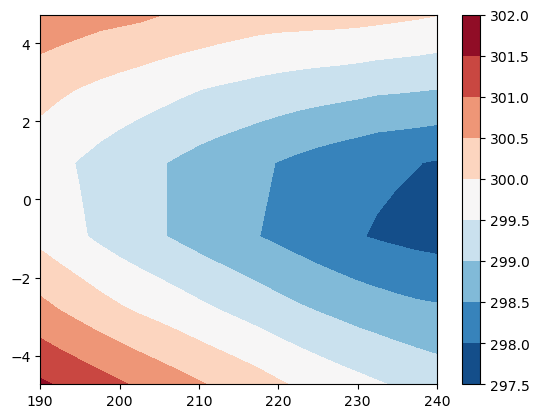

In [16]:
plt.contourf(ts2_nino34.lon, ts2_nino34.lat, ts2_nino34[0,:,:], cmap='RdBu_r')
plt.colorbar()

## Lat weighting

In [18]:
weights = np.cos(np.deg2rad(ds.lat))
weights.dims

('lat',)

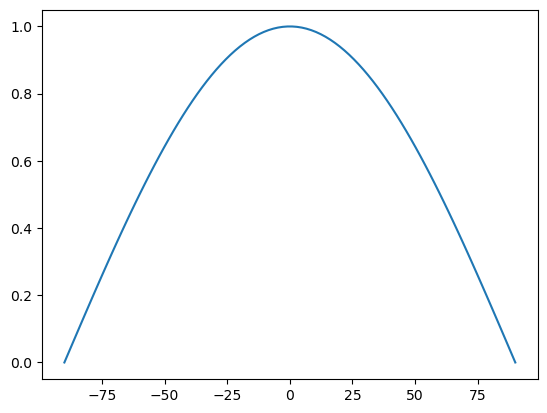

In [19]:
plt.plot(ds.lat,weights)

In [27]:
ts_weighted = ts2 * weights

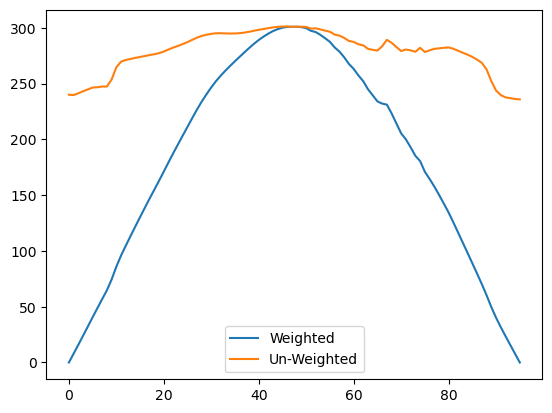

In [28]:
plt.plot(ts_weighted[0,:,0], label = 'Weighted')
plt.plot(ts2[0,:,0], label = 'Un-Weighted')
plt.legend()

In [35]:
weights

<xarray.DataArray 'lat' (lat: 96)>
array([6.12323400e-17, 3.30633693e-02, 6.60905843e-02, 9.90455303e-02,
       1.31892171e-01, 1.64594590e-01, 1.97117027e-01, 2.29423920e-01,
       2.61479941e-01, 2.93250037e-01, 3.24699469e-01, 3.55793847e-01,
       3.86499169e-01, 4.16781860e-01, 4.46608807e-01, 4.75947393e-01,
       5.04765538e-01, 5.33031729e-01, 5.60715057e-01, 5.87785252e-01,
       6.14212713e-01, 6.39968541e-01, 6.65024572e-01, 6.89353409e-01,
       7.12928448e-01, 7.35723911e-01, 7.57714870e-01, 7.78877279e-01,
       7.99187997e-01, 8.18624815e-01, 8.37166478e-01, 8.54792713e-01,
       8.71484244e-01, 8.87222819e-01, 9.01991230e-01, 9.15773327e-01,
       9.28554038e-01, 9.40319390e-01, 9.51056516e-01, 9.60753676e-01,
       9.69400266e-01, 9.76986831e-01, 9.83505075e-01, 9.88947871e-01,
       9.93309266e-01, 9.96584493e-01, 9.98769969e-01, 9.99863305e-01,
       9.99863305e-01, 9.98769969e-01, 9.96584493e-01, 9.93309266e-01,
       9.88947871e-01, 9.83505075e-01, 9.76986831e-01, 9.69400266e-01,
       9.60753676e-01, 9.51056516e-01, 9.40319390e-01, 9.28554038e-01,
       9.15773327e-01, 9.01991230e-01, 8.87222819e-01, 8.71484244e-01,
       8.54792713e-01, 8.37166478e-01, 8.18624815e-01, 7.99187997e-01,
       7.78877279e-01, 7.57714870e-01, 7.35723911e-01, 7.12928448e-01,
       6.89353409e-01, 6.65024572e-01, 6.39968541e-01, 6.14212713e-01,
       5.87785252e-01, 5.60715057e-01, 5.33031729e-01, 5.04765538e-01,
       4.75947393e-01, 4.46608807e-01, 4.16781860e-01, 3.86499169e-01,
       3.55793847e-01, 3.24699469e-01, 2.93250037e-01, 2.61479941e-01,
       2.29423920e-01, 1.97117027e-01, 1.64594590e-01, 1.31892171e-01,
       9.90455303e-02, 6.60905843e-02, 3.30633693e-02, 2.83276945e-16])
Coordinates:
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
Attributes:
    long_name:  latitude
    units:      degrees_north

In [34]:
ts_weighted2 = ts2.weighted(weights)

ts_weighted2_mean = ts_weighted2.mean(dim=('lon', 'lat'))
ts_weighted2_mean

<xarray.DataArray 'TS' (time: 12)>
array([285.91152715, 286.22425011, 287.04583364, 288.11406651,
       289.1835273 , 289.94657885, 290.17804136, 289.90492042,
       289.27551804, 288.27945739, 287.07329295, 286.1872004 ])
Coordinates:
  * time     (time) object 0010-08-02 12:00:00 ... 0011-07-02 12:00:00

In [38]:
ts_weighted3 = np.average(ts2, weights=weights, axis=1)
ts_weighted3_mean = np.average(ts_weighted3, axis=1)


In [40]:
np.shape(ts_weighted3_mean)

(12,)

In [41]:
ts_weighted3_mean

array([285.91152715, 286.22425011, 287.04583364, 288.11406651,
       289.1835273 , 289.94657885, 290.17804136, 289.90492042,
       289.27551804, 288.27945739, 287.07329295, 286.1872004 ])

In [ ]:
plt.plot(ts_weighted2[0,:,0], label = 'Weighted')
plt.plot(ts_weighted3[0,:,0], label = 'Un-Weighted')
plt.legend()